In [83]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import re
import tqdm
import seaborn as sns

In [84]:
test_month = pd.read_csv('Basic - Azrieli & Sons data/trips_data/april 2015_4781353.csv')
test_month.head()

,Unnamed: 0,customer,driver_id,end_time,km,start_time
0,0,iaf,570,2015-04-01 09:36:00,672.312716,2015-04-01 01:55:00
1,1,yes,822,2015-04-01 16:17:00,96.048221,2015-04-01 15:12:00
2,2,intel,437,2015-04-02 04:15:00,90.727997,2015-04-02 02:49:00
3,3,yes,70,2015-04-02 15:41:00,216.595350,2015-04-02 12:41:00
4,4,jerusalem_muni,446,NaN,96.437630,2015-04-03 00:15:00


In [85]:
directory = 'Basic - Azrieli & Sons data/trips_data'

# Initialize an empty list to store the data, and a set to store the base names of the files that have been processed to avoid duplicates.
data = []
processed_files = set()

# Iterate over each file in the directory
for filename in tqdm.tqdm(os.listdir(directory)):
    if filename.endswith(".csv"):
        # Use a regex to remove suffixes like '(2)'
        base_name = re.sub(r'\(\d+\)', '', filename)

        # Skip processing if this base name has already been processed
        if base_name in processed_files:
            continue

        processed_files.add(base_name)
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, header=0)

        df['Driver_id'] = df['driver_id']
        df['Company'] = df['customer']
        df['Kilometers'] = df['km']
        df['Month'] = filename.split(' ')[0].capitalize()

        df['Start_time'] = pd.to_datetime(df['start_time'])
        df['End_time'] = pd.to_datetime(df['end_time'])
        
        data.append(df[['Driver_id', 'Company', 'Kilometers', 'Month', 'Start_time', 'End_time']])

summary_df = pd.concat(data)
print(summary_df)

 16%|█▋        | 1000/6111 [00:10<00:54, 94.08it/s]C:\Users\edeng\AppData\Local\Temp\ipykernel_14568\3962741354.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['End_time'] = pd.to_datetime(df['end_time'])
100%|██████████| 6111/6111 [01:02<00:00, 98.48it/s] 


    Driver_id         Company   Kilometers      Month          Start_time  \
0         570             iaf   672.312716      April 2015-04-01 01:55:00   
1         822             yes    96.048221      April 2015-04-01 15:12:00   
2         437           intel    90.727997      April 2015-04-02 02:49:00   
3          70             yes   216.595350      April 2015-04-02 12:41:00   
4         446  jerusalem_muni    96.437630      April 2015-04-03 00:15:00   
..        ...             ...          ...        ...                 ...   
49        549             iaf   338.646624  September 2015-09-25 14:02:00   
50        398             yes   690.632760  September 2015-09-26 00:11:00   
51        924           tnuva    74.532361  September 2015-09-26 15:12:00   
52        884            tara   534.599297  September 2015-09-27 00:05:00   
53        901             yes  3129.821745  September 2015-09-27 13:57:00   

              End_time  
0  2015-04-01 09:36:00  
1  2015-04-01 16:17:00  


In [86]:
summary_df.head()

,Driver_id,Company,Kilometers,Month,Start_time,End_time
0,570,iaf,672.312716,April,2015-04-01 01:55:00,2015-04-01 09:36:00
1,822,yes,96.048221,April,2015-04-01 15:12:00,2015-04-01 16:17:00
2,437,intel,90.727997,April,2015-04-02 02:49:00,2015-04-02 04:15:00
3,70,yes,216.595350,April,2015-04-02 12:41:00,2015-04-02 15:41:00
4,446,jerusalem_muni,96.437630,April,2015-04-03 00:15:00,NaT


In [87]:
# Check for missing values
summary_df.isnull().sum()

Driver_id        0
Company          0
Kilometers       0
Month            0
Start_time    3149
End_time      3083
dtype: int64

In [88]:
# Check for duplicates
summary_df.duplicated().sum()

0

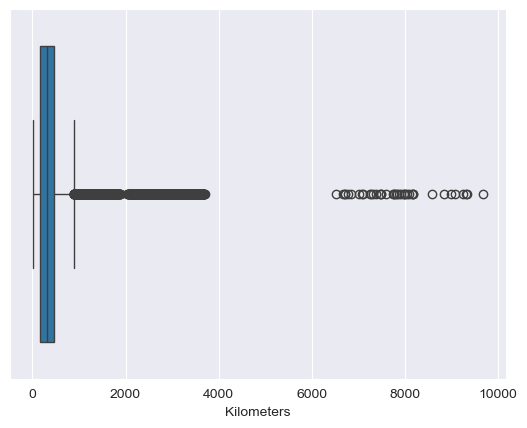

In [89]:
# Check for outliers
sns.boxplot(x=summary_df['Kilometers'])
plt.show()

<Axes: xlabel='Kilometers', ylabel='Count'>

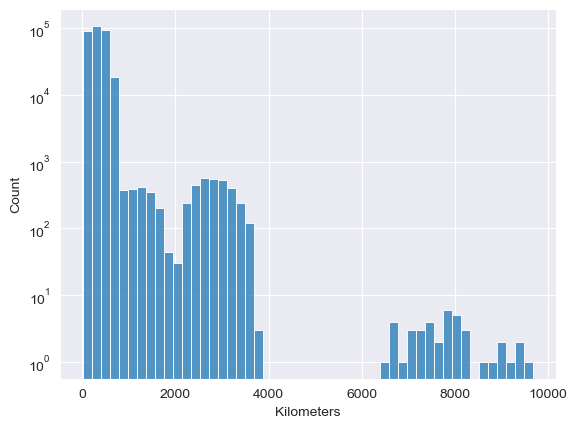

In [90]:
# check for outliers
sns.histplot(summary_df['Kilometers'], bins=50, log=True)

In [91]:
summary_df['Duration'] = summary_df['End_time'] - summary_df['Start_time']
summary_df['Duration'] = summary_df['Duration'].dt.total_seconds() / 3600

summary_df['Speed'] = summary_df['Kilometers'] / summary_df['Duration']

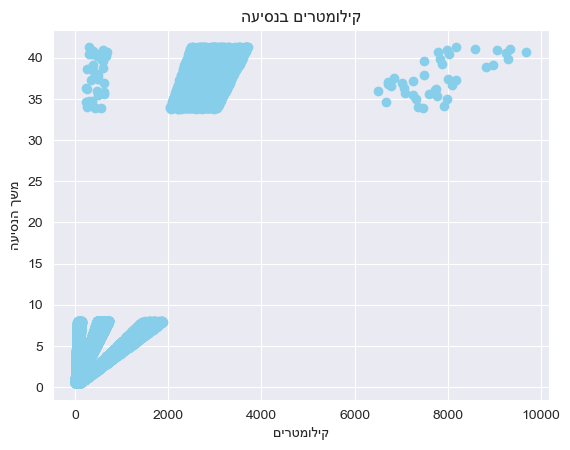

In [92]:
plt.scatter(summary_df['Kilometers'], summary_df['Duration'], color='skyblue')
plt.xlabel('םירטמוליק')
plt.ylabel('העיסנה ךשמ')
plt.title('העיסנב םירטמוליק')
plt.show()

<Axes: xlabel='Speed', ylabel='Count'>

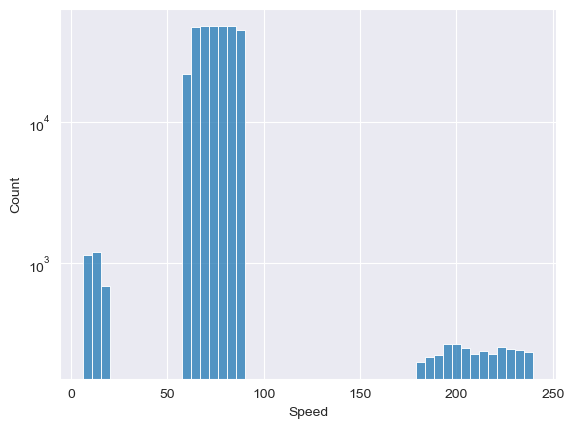

In [93]:
# plot the speed distribution
sns.histplot(summary_df['Speed'], bins=50, log=True)

In [94]:
# plot speed outliers
over_speed = summary_df['Speed'] > 100
under_speed = summary_df['Speed'] < 50

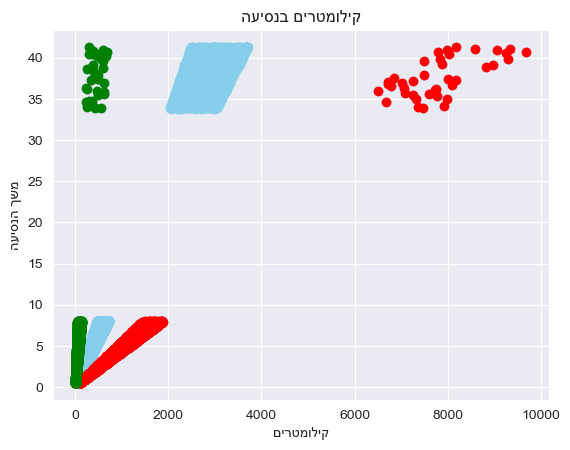

In [95]:
plt.scatter(summary_df['Kilometers'], summary_df['Duration'], color='skyblue')
plt.scatter(summary_df[over_speed]['Kilometers'], summary_df[over_speed]['Duration'], color='red')
plt.scatter(summary_df[under_speed]['Kilometers'], summary_df[under_speed]['Duration'], color='green')
plt.xlabel('םירטמוליק')
plt.ylabel('העיסנה ךשמ')
plt.title('העיסנב םירטמוליק')
plt.show()

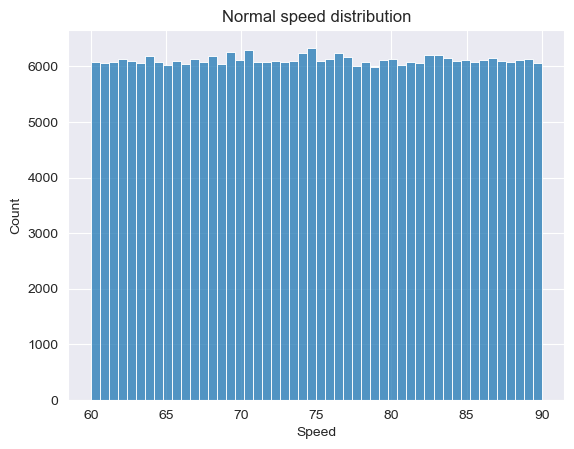

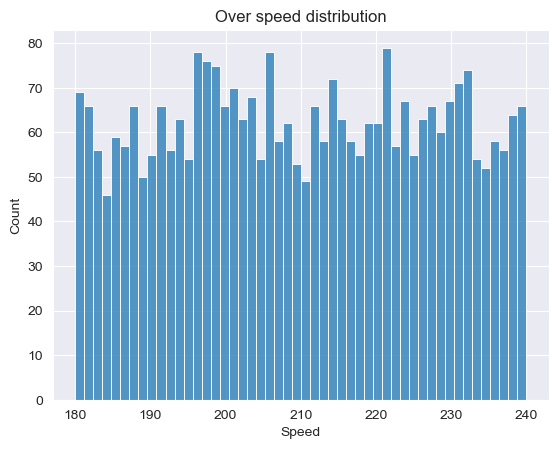

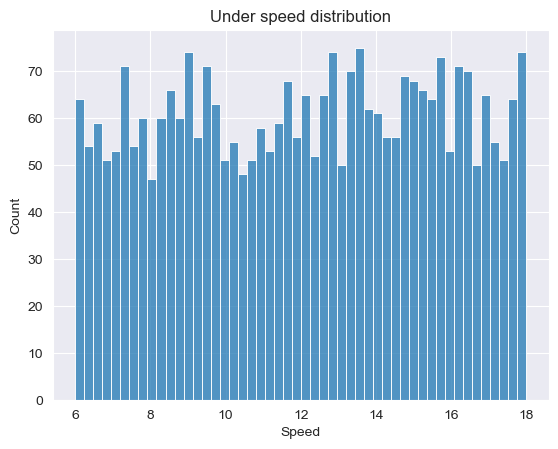

In [96]:
# fix the outliers
over_speed_df = summary_df[over_speed]
under_speed_df = summary_df[under_speed]

normal_speed_df = summary_df[~over_speed & ~under_speed]

# plot speed distributions of each group
sns.histplot(normal_speed_df['Speed'], bins=50)
plt.title('Normal speed distribution')
plt.show()

sns.histplot(over_speed_df['Speed'], bins=50)
plt.title('Over speed distribution')
plt.show()

sns.histplot(under_speed_df['Speed'], bins=50)
plt.title('Under speed distribution')
plt.show()


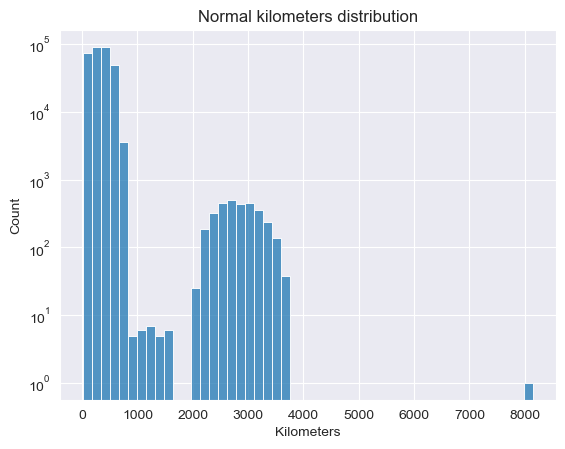

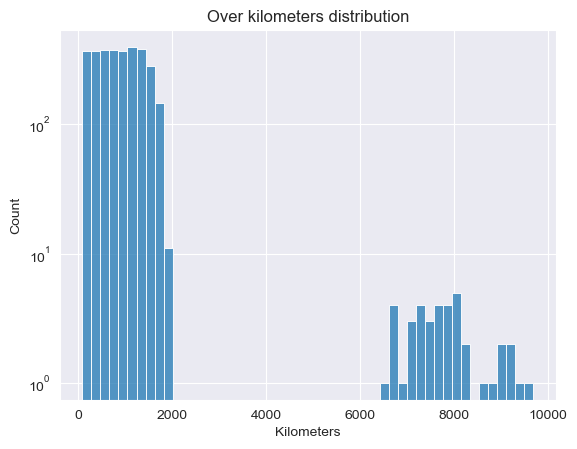

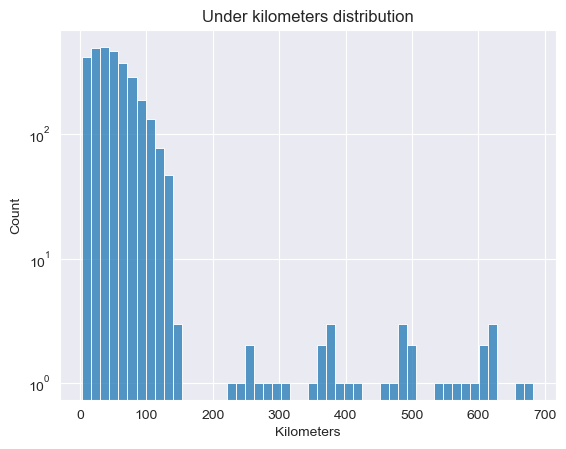

In [97]:
# plot kilometers distribution of each group

sns.histplot(normal_speed_df['Kilometers'], bins=50, log=True)
plt.title('Normal kilometers distribution')
plt.show()

sns.histplot(over_speed_df['Kilometers'], bins=50, log=True)
plt.title('Over kilometers distribution')
plt.show()

sns.histplot(under_speed_df['Kilometers'], bins=50, log=True)
plt.title('Under kilometers distribution')
plt.show()

In [98]:
# Correct kilometers outliers using a regression model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to predict kilometers based on duration, driver id, company and month.
model = LinearRegression()

# Deal with categorical variables
data_for_fitting = pd.get_dummies(summary_df, columns=['Driver_id', 'Company', 'Month']).dropna()

In [99]:
normal_df_fitting = data_for_fitting[(data_for_fitting['Speed']<100)&(data_for_fitting['Speed']>50)].drop(['Start_time', 'End_time', 'Speed'], axis=1)
over_speed_df_fitting = data_for_fitting[data_for_fitting['Speed']>100].drop(['Start_time', 'End_time', 'Speed'], axis=1)
under_speed_df_fitting = data_for_fitting[data_for_fitting['Speed']<50].drop(['Start_time', 'End_time', 'Speed'], axis=1)

In [100]:
target = normal_df_fitting['Kilometers']
features = normal_df_fitting.drop('Kilometers', axis=1)

model.fit(features, target)

# Check the model's score

print("Model score:", model.score(features, target))

Model score: 0.9702601350478158


In [101]:
# Predict the kilometers for the over speed and under speed data
over_speed_df_fitting = over_speed_df_fitting.drop('Kilometers', axis=1)
under_speed_df_fitting = under_speed_df_fitting.drop('Kilometers', axis=1)

over_speed_df['Kilometers'] = model.predict(over_speed_df_fitting)
under_speed_df['Kilometers'] = model.predict(under_speed_df_fitting)

C:\Users\edeng\AppData\Local\Temp\ipykernel_14568\3737009232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_speed_df['Kilometers'] = model.predict(over_speed_df_fitting)
C:\Users\edeng\AppData\Local\Temp\ipykernel_14568\3737009232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_speed_df['Kilometers'] = model.predict(under_speed_df_fitting)


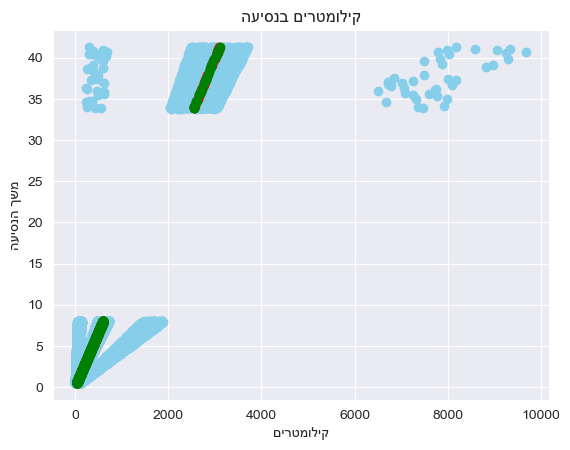

In [102]:
# Check outliers again
plt.scatter(summary_df['Kilometers'], summary_df['Duration'], color='skyblue')
plt.scatter(over_speed_df['Kilometers'], over_speed_df['Duration'], color='red')
plt.scatter(under_speed_df['Kilometers'], under_speed_df['Duration'], color='green')
plt.xlabel('םירטמוליק')
plt.ylabel('העיסנה ךשמ')
plt.title('העיסנב םירטמוליק')
plt.show()

In [103]:
# Update the summary_df with the corrected values
summary_df = pd.concat([normal_speed_df, over_speed_df, under_speed_df])

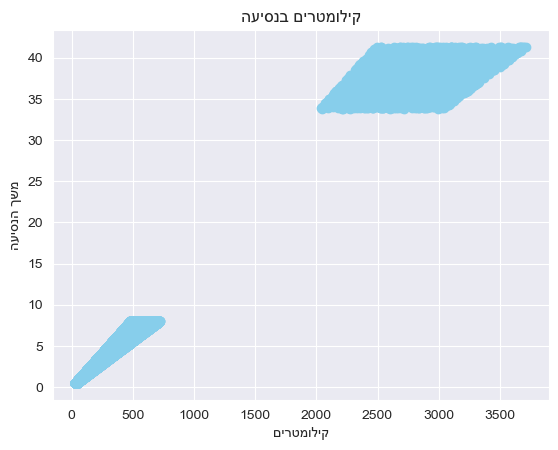

In [104]:
plt.scatter(summary_df['Kilometers'], summary_df['Duration'], color='skyblue')
plt.xlabel('םירטמוליק')
plt.ylabel('העיסנה ךשמ')
plt.title('העיסנב םירטמוליק')
plt.show()

In [105]:
# update the speed column
summary_df['Speed'] = summary_df['Kilometers'] / summary_df['Duration']

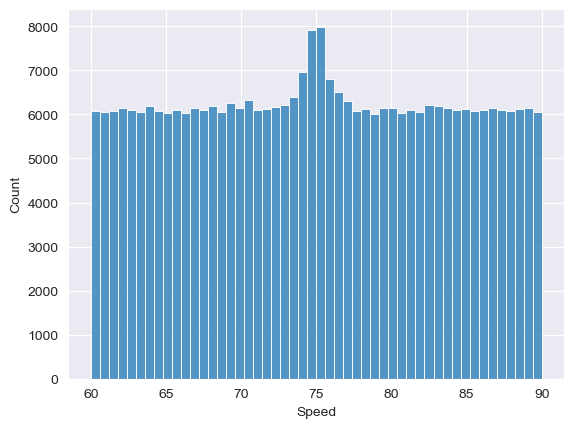

In [106]:
# plot the speed distribution
sns.histplot(summary_df['Speed'], bins=50)
plt.show()

In [107]:
# Check for missing values
summary_df.isnull().sum()

Driver_id        0
Company          0
Kilometers       0
Month            0
Start_time    3149
End_time      3083
Duration      6189
Speed         6189
dtype: int64

In [108]:
# fill missing start_time and end_time based on the other, using the distance drove and average speed of the driver.

# Calculate the average speed of each driver
average_speed = summary_df.groupby('Driver_id')['Speed'].mean()
average_speed = average_speed.reset_index()
average_speed.columns = ['Driver_id', 'Average_speed']
average_speed.head()

,Driver_id,Average_speed
0,1,75.167085
1,2,74.863011
2,3,75.062718
3,4,74.996510
4,5,75.321674


In [109]:
summary_df = summary_df.reset_index(drop=True)

In [110]:
missing_start_time = summary_df['Start_time'].isnull()
missing_end_time = summary_df['End_time'].isnull()

# print both missing:
both_missing = missing_start_time & missing_end_time
both_missing.sum()

43

In [111]:
# Fill missing values
for id in average_speed['Driver_id']:
    summary_df.loc[(missing_start_time & (summary_df['Driver_id']==id)), 'Start_time'] =\
        (summary_df.loc[(missing_start_time & (summary_df['Driver_id']==id)), 'End_time'] -
         pd.to_timedelta(summary_df.loc[(missing_start_time & (summary_df['Driver_id']==id)), 'Kilometers'] / average_speed.loc[average_speed['Driver_id']==id ,'Average_speed'].values[0], unit='h'))
    summary_df.loc[(missing_end_time & (summary_df['Driver_id']==id)), 'End_time'] =\
        (summary_df.loc[(missing_end_time & (summary_df['Driver_id']==id)), 'Start_time'] +
         pd.to_timedelta(summary_df.loc[(missing_end_time & (summary_df['Driver_id']==id)), 'Kilometers'] / average_speed.loc[average_speed['Driver_id']==id ,'Average_speed'].values[0], unit='h'))

# Fix speed and duration
summary_df['Duration'] = summary_df['End_time'] - summary_df['Start_time']
summary_df['Duration'] = summary_df['Duration'].dt.total_seconds() / 3600
summary_df['Speed'] = summary_df['Kilometers'] / summary_df['Duration']

# Check again for missing values
summary_df.isnull().sum()

Driver_id      0
Company        0
Kilometers     0
Month          0
Start_time    43
End_time      43
Duration      43
Speed         43
dtype: int64

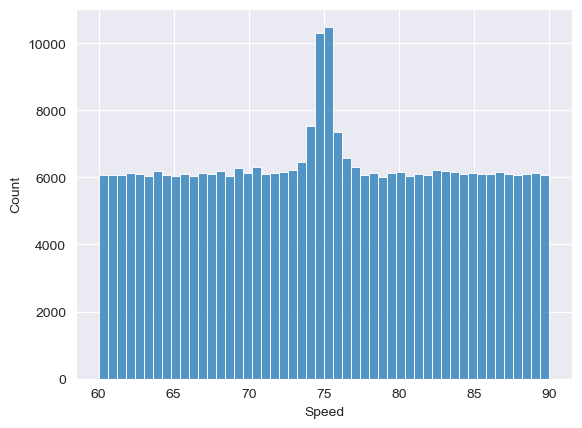

In [112]:
# plot the speed distribution
sns.histplot(summary_df['Speed'], bins=50)
plt.show()

Finished Dealing with the data. Now we can go over to calculating the salaries.

In [113]:
def is_night(time):
    hour = time.hour
    return hour >= 22 or hour < 6

def is_weekend(date):
    shishi = date.hour >= 14 and date.weekday() == 4
    shabat = date.hour < 20 and date.weekday() == 5
    return shishi or shabat

def calculate_bonuses(start_time, end_time):
    total_time = end_time - start_time
    
    night_time = timedelta(0)
    weekend_time = timedelta(0)
    
    if is_night(start_time):
        night_end = start_time.replace(hour=6, minute=0, second=0, microsecond=0)
        if night_end <= start_time:
            night_end += timedelta(days=1)
        night_time += min(end_time, night_end) - start_time
    elif is_night(end_time):
        night_start = end_time.replace(hour=22, minute=0, second=0, microsecond=0)
        if night_start >= end_time:
            night_start -= timedelta(days=1)
        night_time += end_time - max(start_time, night_start)
    
    if is_weekend(start_time):
        weekend_end = start_time.replace(hour=20, minute=0, second=0, microsecond=0) + timedelta(days=(5 - start_time.weekday()) % 7)
        weekend_time += min(end_time, weekend_end) - start_time
    elif is_weekend(end_time):
        weekend_start = end_time.replace(hour=14, minute=0, second=0, microsecond=0) - timedelta(days=(end_time.weekday() - 4) % 7)
        weekend_time += end_time - max(start_time, weekend_start)
    
    night_bonus = night_time / total_time
    weekend_bonus = weekend_time / total_time
    
    return night_bonus, weekend_bonus

In [114]:
# Calculate bonuses for each trip

summary_df['Night_bonus'] = .0
summary_df['Weekend_bonus'] = .0

for i, row in tqdm.tqdm(summary_df.iterrows()):
    night_bonus, weekend_bonus = calculate_bonuses(row['Start_time'], row['End_time'])
    summary_df.loc[i, 'Night_bonus'] = night_bonus
    summary_df.loc[i, 'Weekend_bonus'] = weekend_bonus

summary_df.head()

318181it [05:23, 983.84it/s] 


,Driver_id,Company,Kilometers,Month,Start_time,End_time,Duration,Speed,Night_bonus,Weekend_bonus
0,570,iaf,672.312716,April,2015-04-01 01:55:00,2015-04-01 09:36:00.000000000,7.683333,87.502740,0.531453,0.0
1,822,yes,96.048221,April,2015-04-01 15:12:00,2015-04-01 16:17:00.000000000,1.083333,88.659896,0.000000,0.0
2,437,intel,90.727997,April,2015-04-02 02:49:00,2015-04-02 04:15:00.000000000,1.433333,63.298603,1.000000,0.0
3,70,yes,216.595350,April,2015-04-02 12:41:00,2015-04-02 15:41:00.000000000,3.000000,72.198450,0.000000,0.0
4,446,jerusalem_muni,96.437630,April,2015-04-03 00:15:00,2015-04-03 01:32:17.288229966,1.288136,74.866053,1.000000,0.0


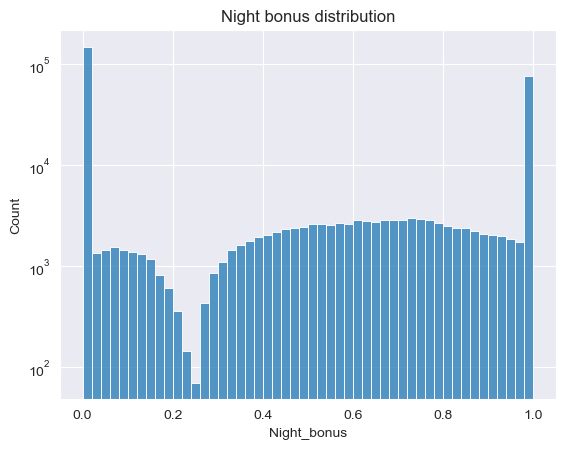

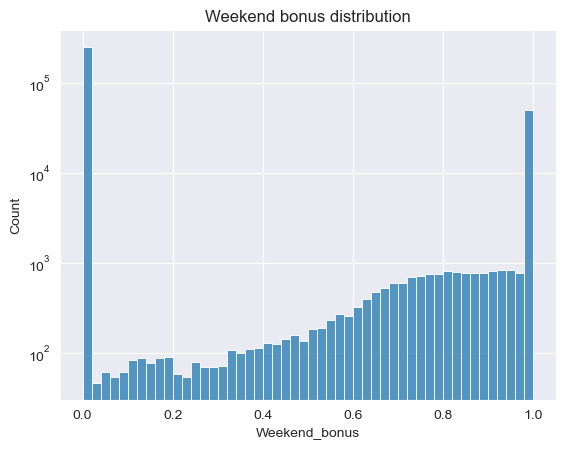

In [115]:
sns.histplot(summary_df['Night_bonus'], bins=50, log=True)
plt.title('Night bonus distribution')
plt.show()

sns.histplot(summary_df['Weekend_bonus'], bins=50, log=True)
plt.title('Weekend bonus distribution')
plt.show()

In [116]:
tariff = pd.read_csv('Basic - Azrieli & Sons data/taarif.csv', header=0)
tariff.tail()

,customer,basic_taarif,extra_milage,night_bonus,weekend_bonus
8,osem,12.0,4.0,20.0,0.0
9,iaf,20.0,10.0,20.0,50.0
10,tara,6.0,6.0,50.0,30.0
11,electricity,10.0,5.0,40.0,70.0
12,bituch_leumi,5.0,5.0,5.0,5.0


In [117]:
summary_df['Company'].unique()

array(['iaf', 'yes', 'intel', 'jerusalem_muni', 'electricity',
       'bituch_leumi', 'angel', 'osem', 'tara', 'tnuva', 'hot', 'aminach'],
      dtype=object)

In [118]:
summary_df['Company'] = summary_df['Company'].replace({"yes": "dbs", "aminach": "mizranei_kfar_saba"}) # Fix company names

In [119]:
def salary(row):
    company = row['Company']
    kilometers = row['Kilometers']
    night_bonus = row['Night_bonus']
    weekend_bonus = row['Weekend_bonus']

    company_tariff = tariff[tariff['customer'] == company]
    if company_tariff.empty:
        return 0

    base_rate = company_tariff['basic_taarif'].values[0]
    extra_rate = company_tariff['extra_milage'].values[0]
    night_rate = company_tariff['night_bonus'].values[0]
    weekend_rate = company_tariff['weekend_bonus'].values[0]

    base_kilometers = min(kilometers, 200)
    extra_kilometers = max(kilometers - 200, 0)

    night_bonus = night_bonus * night_rate
    weekend_bonus = weekend_bonus * weekend_rate

    basic_salary = base_kilometers * base_rate + extra_kilometers * extra_rate
    salary_with_bonus = basic_salary + basic_salary * night_bonus / 100 + basic_salary * weekend_bonus / 100
    
    return salary_with_bonus

In [120]:
summary_df['salary'] = summary_df.apply(salary, axis=1)
summary_df

,Driver_id,Company,Kilometers,Month,Start_time,End_time,Duration,Speed,Night_bonus,Weekend_bonus,salary
0,570,iaf,672.312716,April,2015-04-01 01:55:00,2015-04-01 09:36:00.000000000,7.683333,87.502740,0.531453,0.0,9650.314212
1,822,dbs,96.048221,April,2015-04-01 15:12:00,2015-04-01 16:17:00.000000000,1.083333,88.659896,0.000000,0.0,960.482210
2,437,intel,90.727997,April,2015-04-02 02:49:00,2015-04-02 04:15:00.000000000,1.433333,63.298603,1.000000,0.0,870.988775
3,70,dbs,216.595350,April,2015-04-02 12:41:00,2015-04-02 15:41:00.000000000,3.000000,72.198450,0.000000,0.0,2132.762801
4,446,jerusalem_muni,96.437630,April,2015-04-03 00:15:00,2015-04-03 01:32:17.288229966,1.288136,74.866053,1.000000,0.0,1157.251557
...,...,...,...,...,...,...,...,...,...,...,...
318176,483,intel,235.117310,September,2015-09-22 00:22:00,2015-09-22 03:27:00.000000000,3.083333,76.254263,1.000000,0.0,2172.844629
318177,302,hot,178.565308,September,2015-09-16 15:11:00,2015-09-16 17:31:00.000000000,2.333333,76.527989,0.000000,0.0,0.000000
318178,510,tnuva,505.925171,September,2015-09-17 01:22:00,2015-09-17 08:05:00.000000000,6.716667,75.323847,0.689826,0.0,3286.493314
318179,585,tnuva,440.274780,September,2015-09-10 02:12:00,2015-09-10 08:07:00.000000000,5.916667,74.412639,0.642254,0.0,2907.749298


In [121]:
old_drivers_info = pd.read_csv('Basic - Azrieli & Sons data/Drivers_with_kviut.csv', header=0)
new_drivers_info = pd.read_csv('Basic - Azrieli & Sons data/new_drivers.csv', header=0)

# keep only one digit after point
new_drivers_info['vetek'] = (new_drivers_info['vetek'] / 365).round(1) 

drivers_info = pd.concat([old_drivers_info, new_drivers_info])
drivers_info

,Unnamed: 0,birthdate,gender,id,vetek
0,100,27/05/1964,m,502,7.9
1,101,10/07/1983,M,81,14.4
2,102,15/10/1992,M,814,18.7
3,103,18/07/1990,M,666,8.7
4,104,10/04/1969,M,205,9.9
...,...,...,...,...,...
95,95,16/08/1990,M,798,0.4
96,96,05/06/1967,M,865,0.3
97,97,02/10/1972,M,399,0.9
98,98,16/03/1979,M,509,0.5


In [122]:
drivers_info['gender'].unique()

array(['m', 'M', 'girl', 'male', 'unknown', 'F', 'none', 'female', 'boy',
       nan, 'woman'], dtype=object)

In [123]:
gender_map = {'m': 'M', 'M': 'M', 'male': 'M', 'boy': 'M', 'girl': 'F', 'female': 'F', 'F': 'F', 'unknown': 'unknown', 'none': 'unknown', np.nan: 'unknown', 'NaN': 'unknown', None: 'unknown'}
drivers_info['gender'] = drivers_info['gender'].map(gender_map)
drivers_info['gender'] = drivers_info['gender'].fillna('unknown')
drivers_info['gender'].unique()

array(['M', 'F', 'unknown'], dtype=object)

In [124]:
def parse_date(date_str):
    formats = ['%d/%m/%Y', '%B %d, %Y']
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

drivers_info['parsed_dates'] = drivers_info['birthdate'].apply(lambda x: parse_date(x) if pd.notnull(x) else None)

def calculate_age(birthdate):
    if birthdate is None:
        return 'Unknown'
    today = datetime.today()
    age = (today - birthdate).days / 365
    if age > 100 or age < 0 or age in [np.nan, np.inf, -np.inf, 'nan', 'NaN']:
        return 'Unknown'
    return f"{age:.1f}"

drivers_info['age'] = drivers_info['parsed_dates'].apply(calculate_age)

drivers_info

,Unnamed: 0,birthdate,gender,id,vetek,parsed_dates,age
0,100,27/05/1964,M,502,7.9,1964-05-27,60.3
1,101,10/07/1983,M,81,14.4,1983-07-10,41.1
2,102,15/10/1992,M,814,18.7,1992-10-15,31.9
3,103,18/07/1990,M,666,8.7,1990-07-18,34.1
4,104,10/04/1969,M,205,9.9,1969-04-10,55.4
...,...,...,...,...,...,...,...
95,95,16/08/1990,M,798,0.4,1990-08-16,34.0
96,96,05/06/1967,M,865,0.3,1967-06-05,57.2
97,97,02/10/1972,M,399,0.9,1972-10-02,51.9
98,98,16/03/1979,M,509,0.5,1979-03-16,45.5


In [125]:
drivers_info.drop(columns=['birthdate', 'parsed_dates'], inplace=True)
drivers_info.replace({'nan': 'Unknown'}, inplace=True)
drivers_info.fillna('Unknown', inplace=True)
drivers_info.set_index('id', inplace=True)
drivers_info

,Unnamed: 0,gender,vetek,age
id,,,,
502,100,M,7.9,60.3
81,101,M,14.4,41.1
814,102,M,18.7,31.9
666,103,M,8.7,34.1
205,104,M,9.9,55.4
...,...,...,...,...
798,95,M,0.4,34.0
865,96,M,0.3,57.2
399,97,M,0.9,51.9


In [126]:
summary_df = summary_df.drop(columns=['Night_bonus', 'Weekend_bonus', 'Company', 'Duration', 'Speed', 'Start_time', 'End_time'])
summary_df

,Driver_id,Kilometers,Month,salary
0,570,672.312716,April,9650.314212
1,822,96.048221,April,960.482210
2,437,90.727997,April,870.988775
3,70,216.595350,April,2132.762801
4,446,96.437630,April,1157.251557
...,...,...,...,...
318176,483,235.117310,September,2172.844629
318177,302,178.565308,September,0.000000
318178,510,505.925171,September,3286.493314
318179,585,440.274780,September,2907.749298


In [127]:
summary_df.rename(columns={'Kilometers': 'Total_km', "salary": "Total_income"}, inplace=True)
grouped_df = summary_df.groupby(['Driver_id', 'Month'], as_index='True').sum()
grouped_df

Total_km  Total_income
Driver_id Month                                
1         April       8637.293215  69082.011329
          August      9396.108896  69415.176599
          December    8815.953930  67533.523076
          February    6845.834623  56969.997831
          January    11246.923101  94219.142527
...                           ...           ...
1000      March       8293.896192  62821.650374
          May         7399.463992  61982.962618
          November   10558.536371  84478.255408
          October     8713.946823  89526.442572
          September   8800.036350  69612.400633

[12000 rows x 2 columns]

In [128]:
grouped_df.index.names = ['id', 'Month']
grouped_df

Total_km  Total_income
id   Month                                
1    April       8637.293215  69082.011329
     August      9396.108896  69415.176599
     December    8815.953930  67533.523076
     February    6845.834623  56969.997831
     January    11246.923101  94219.142527
...                      ...           ...
1000 March       8293.896192  62821.650374
     May         7399.463992  61982.962618
     November   10558.536371  84478.255408
     October     8713.946823  89526.442572
     September   8800.036350  69612.400633

[12000 rows x 2 columns]

In [129]:
final_df = grouped_df.join(drivers_info, how='inner')
final_df

Total_km  Total_income  Unnamed: 0 gender  vetek   age
id   Month                                                                
1    April       8637.293215  69082.011329         766      F    1.4  42.6
     August      9396.108896  69415.176599         766      F    1.4  42.6
     December    8815.953930  67533.523076         766      F    1.4  42.6
     February    6845.834623  56969.997831         766      F    1.4  42.6
     January    11246.923101  94219.142527         766      F    1.4  42.6
...                      ...           ...         ...    ...    ...   ...
1000 March       8293.896192  62821.650374         260      M    4.0  44.0
     May         7399.463992  61982.962618         260      M    4.0  44.0
     November   10558.536371  84478.255408         260      M    4.0  44.0
     October     8713.946823  89526.442572         260      M    4.0  44.0
     September   8800.036350  69612.400633         260      M    4.0  44.0

[12000 rows x 6 columns]

In [130]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [131]:
final_df

Total_km  Total_income gender  vetek   age
id   Month                                                    
1    April       8637.293215  69082.011329      F    1.4  42.6
     August      9396.108896  69415.176599      F    1.4  42.6
     December    8815.953930  67533.523076      F    1.4  42.6
     February    6845.834623  56969.997831      F    1.4  42.6
     January    11246.923101  94219.142527      F    1.4  42.6
...                      ...           ...    ...    ...   ...
1000 March       8293.896192  62821.650374      M    4.0  44.0
     May         7399.463992  61982.962618      M    4.0  44.0
     November   10558.536371  84478.255408      M    4.0  44.0
     October     8713.946823  89526.442572      M    4.0  44.0
     September   8800.036350  69612.400633      M    4.0  44.0

[12000 rows x 5 columns]

In [132]:
final_df.to_csv('Basic - Azrieli & Sons data/summary.csv')

In [133]:
id_df = final_df.droplevel(1)
id_df

,Total_km,Total_income,gender,vetek,age
id,,,,,
1,8637.293215,69082.011329,F,1.4,42.6
1,9396.108896,69415.176599,F,1.4,42.6
1,8815.953930,67533.523076,F,1.4,42.6
1,6845.834623,56969.997831,F,1.4,42.6
1,11246.923101,94219.142527,F,1.4,42.6
...,...,...,...,...,...
1000,8293.896192,62821.650374,M,4.0,44.0
1000,7399.463992,61982.962618,M,4.0,44.0
1000,10558.536371,84478.255408,M,4.0,44.0


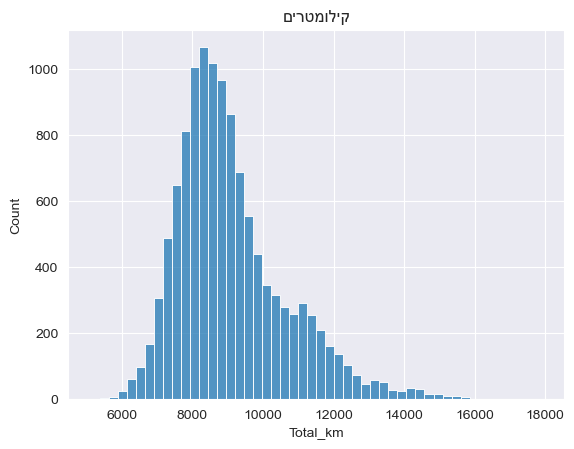

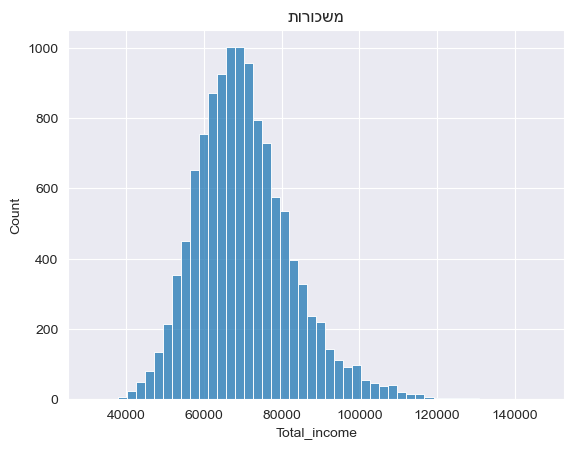

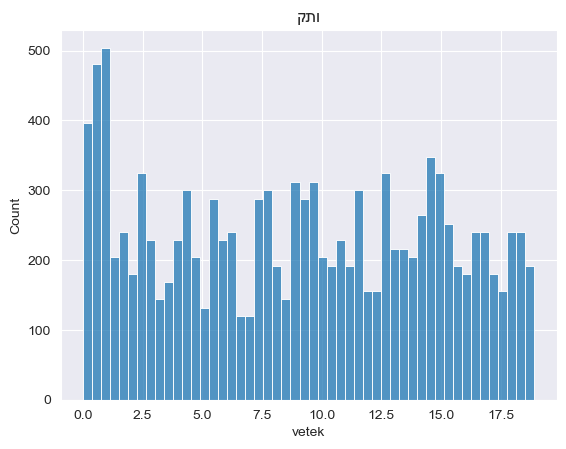

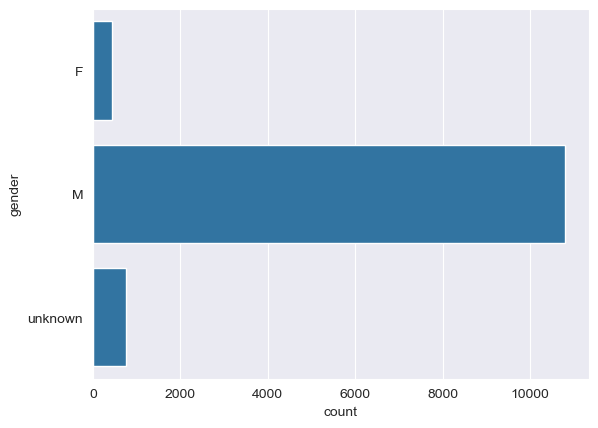

In [140]:
# make some visualizations to show mr azreli, with the columns Total_km, Total_income, gender, age, vetek:

sns.histplot(id_df['Total_km'], bins=50)
plt.title('םירטמוליק')
plt.show()

sns.histplot(id_df['Total_income'], bins=50)
plt.title('תורוכשמ')
plt.show()

sns.histplot(id_df['vetek'], bins=50)
plt.title('קתו')
plt.show()

sns.countplot(id_df['gender'])
plt.show()

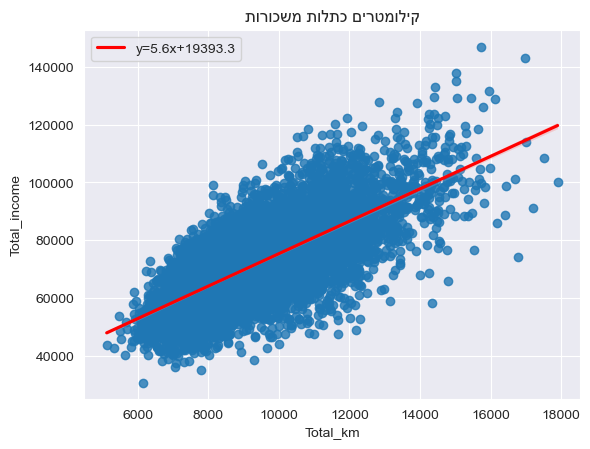

In [141]:
# connections between the columns
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(id_df['Total_km'],id_df['Total_income'])

sns.regplot(data=id_df, x='Total_km', y='Total_income', line_kws={'color': 'red', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.legend()
plt.title('תורוכשמ תולתכ םירטמוליק')
plt.show()

In [136]:
print(f"Average tarif: {tariff['basic_taarif'].mean()}")
print(f"Median tarif: {tariff['basic_taarif'].median()}")

Average tarif: 9.0
Median tarif: 8.0


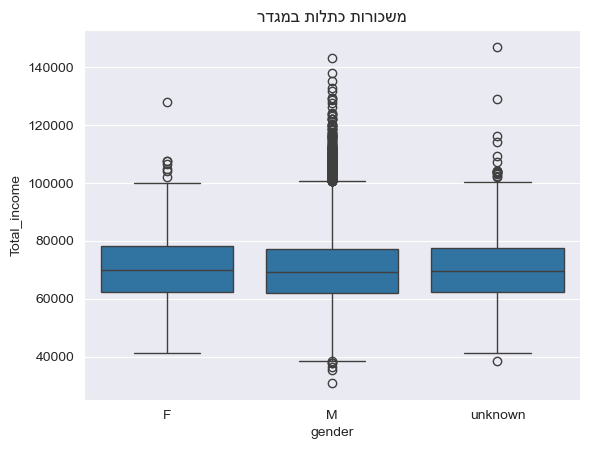

In [143]:
# show the salary based on the gender and vetek

sns.boxplot(data=id_df, x="gender", y="Total_income")
plt.title("רדגמב תולתכ תורוכשמ")
plt.show()